In [ ]:
from google.colab import drive
drive.mount('/content/drive')

! pip install pywph==1.0

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pywph as pw
import numpy as np
import torch


Mounted at /content/drive
Reason for being yanked: Wrong requirements.


In [ ]:
params = pd.read_csv('drive/MyDrive/camels data/params.csv')
nbody_file = np.load('drive/MyDrive/camels data/Maps_Mtot_Nbody_SIMBA_LH_z=0.00.npy')
mean_coeffs = pd.read_csv('drive/MyDrive/camels data/mean_coeffs.csv')

omega: fraction of energy density in matter(dark matter+baryons)

sigma: variance of the linear field

SN1: galactic winds

SN2: galactic winds

AGN1: BH feedback

AGN2: BH feedback

In [ ]:
nbody = np.copy(nbody_file[0])
data = np.log(nbody)

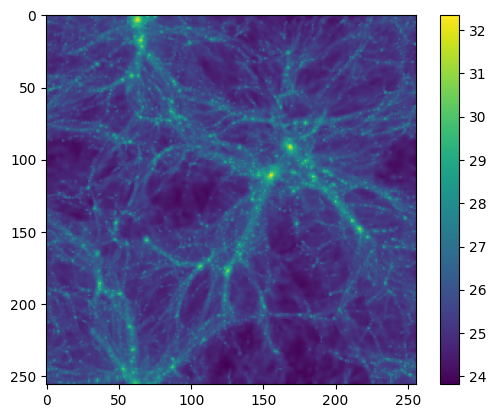

In [ ]:
plt.imshow(data)
plt.colorbar()

In [ ]:
M = 256
N = 256
J = 7
L = 4
dn =0

wph_op = pw.WPHOp(M, N, J, L=L, dn=dn) # operator
coeff = wph_op(data) # get coefficients
wph = wph_op(data, ret_wph_obj=True)

if torch.cuda.is_available():
    wph_op.to(0)

In [ ]:
# obtain coefficients and their corresponding indices
s11, s11_in = wph.get_coeffs("S11")
s00, s00_in = wph.get_coeffs("S00")
s01, s01_in = wph.get_coeffs("S01")
c01, c01_in = wph.get_coeffs("C01")
cphase,cphase_in = wph.get_coeffs("Cphase")

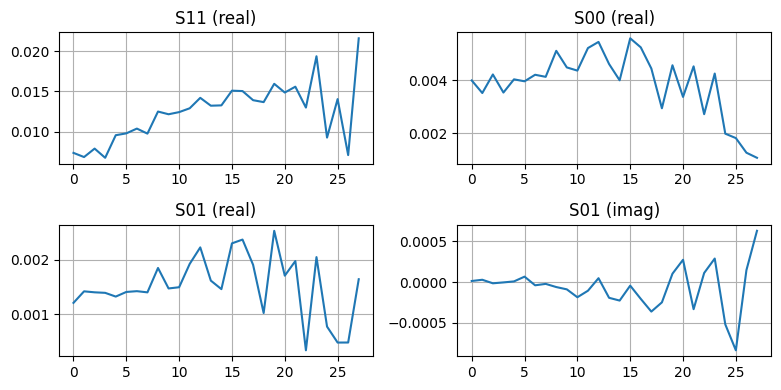

In [ ]:
# s coefficients
fig, axs = plt.subplots(2, 2, figsize=(8, 4))

axs[0,0].plot(s11.real)
axs[0,1].plot(s00.real)
axs[1,0].plot(s01.real)
axs[1,1].plot(s01.imag)

axs[0,0].set_title('S11 (real)')
axs[0,1].set_title('S00 (real)')
axs[1,0].set_title('S01 (real)')
axs[1,1].set_title('S01 (imag)')

for i in range(0,2):
  for j in range(0,2):
    axs[i,j].grid()

fig.tight_layout()
fig.show()

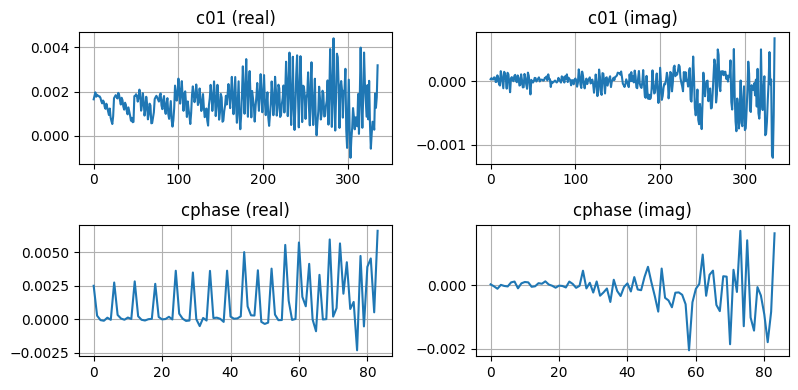

In [ ]:
# c coefficients
fig, axs = plt.subplots(2, 2, figsize=(8, 4))

axs[0,0].plot(c01.real)
axs[0,1].plot(c01.imag)
axs[1,0].plot(cphase.real)
axs[1,1].plot(cphase.imag)

axs[0,0].set_title('c01 (real)')
axs[0,1].set_title('c01 (imag)')
axs[1,0].set_title('cphase (real)')
axs[1,1].set_title('cphase (imag)')

for i in range(0,2):
  for j in range(0,2):
    axs[i,j].grid()

fig.tight_layout()

In [ ]:
print(s00.shape,s11.shape,s01.shape,c01.shape,cphase.shape)

(28,) (28,) (28,) (336,) (84,)


In [ ]:
def get_mean_coeffs(M,N,J,L,dn,data):
  wph_op = pw.WPHOp(M, N, J, L=L, dn=dn) # operator
  coeff = wph_op(data) # get coefficients
  wph = wph_op(data, ret_wph_obj=True)

  s11 = wph.get_coeffs("S11")[0]
  s00 = wph.get_coeffs("S00")[0]
  s01 = wph.get_coeffs("S01")[0]
  c01 = wph.get_coeffs("C01")[0]
  cphase = wph.get_coeffs("Cphase")[0]

  s11_real = s11.real
  s00_real = s00.real
  s01_real = s01.real
  s01_imag = s01.imag

  c01_real = c01.real
  c01_imag = c01.imag
  cphase_real = cphase.real
  cphase_imag = cphase.imag

  s11_real_mean = np.mean(s11_real)
  s00_real_mean = np.mean(s00_real)
  s01_real_mean = np.mean(s01_real)
  s01_imag_mean = np.mean(s01_imag)

  c01_real_mean = np.mean(c01_real)
  c01_imag_mean = np.mean(c01_imag)
  cphase_real_mean = np.mean(cphase_real)
  cphase_imag_mean = np.mean(cphase_imag)

  return np.array((s11_real_mean,s00_real_mean,s01_real_mean,s01_imag_mean,c01_real_mean,c01_imag_mean,cphase_real_mean,cphase_imag_mean))



In [ ]:
params

omega   sigma      SN1      SN2     AGN1     AGN2
0    0.1462  0.6242  2.87986  0.57995  0.91447  0.69786
1    0.1198  0.7926  1.46815  2.03073  0.58601  0.90063
2    0.4226  0.9034  2.59188  0.37113  0.56370  1.33700
3    0.2398  0.7182  2.09943  0.37945  1.80876  1.08147
4    0.3742  0.8910  0.26316  2.93630  1.59660  1.09505
..      ...     ...      ...      ...      ...      ...
995  0.1254  0.7338  0.32488  1.00975  0.64752  1.01748
996  0.1646  0.7682  1.64947  0.75054  0.73969  0.67877
997  0.3018  0.8182  0.69448  0.28837  0.57157  0.54299
998  0.2970  0.6314  2.80889  1.71000  1.69232  0.76154
999  0.1134  0.9038  2.30697  0.96326  0.58035  0.90188

[1000 rows x 6 columns]

In [ ]:
mean_coeffs = mean_coeffs.iloc[:,1:]

In [ ]:
mean_coeffs.to_csv('drive/MyDrive/camels data/mean_coeffs.csv')

In [ ]:
mean_coeffs

s11_real_mean  s00_real_mean  s01_real_mean  s01_imag_mean  \
0         0.012413       0.003884       0.001518      -0.000063   
1         0.012343       0.003639       0.001220      -0.000034   
2         0.012660       0.004473       0.001719      -0.000169   
3         0.011627       0.003829       0.001239      -0.000025   
4         0.011159       0.003772       0.001390      -0.000144   
..             ...            ...            ...            ...   
995       0.015184       0.004865       0.001556      -0.000225   
996       0.016337       0.004936       0.001526      -0.000081   
997       0.016978       0.005121       0.001979       0.000156   
998       0.014322       0.004999       0.001884      -0.000115   
999       0.013724       0.004373       0.001632       0.000058   

     c01_real_mean  c01_imag_mean  cphase_real_mean  cphase_imag_mean  
0         0.001542      -0.000054          0.001196         -0.000122  
1         0.001494       0.000074          0.001006          0.000068  
2         0.001688      -0.000061          0.001396         -0.000338  
3         0.001415      -0.000040          0.000947          0.000074  
4         0.001389      -0.000014          0.001103         -0.000059  
..             ...            ...               ...               ...  
995       0.001874      -0.000101          0.001224         -0.000170  
996       0.001921      -0.000025          0.001269         -0.000108  
997       0.002068       0.000133          0.001568          0.000173  
998       0.001897      -0.000088          0.001591         -0.000116  
999       0.001748      -0.000011          0.001467          0.000092  

[1000 rows x 8 columns]

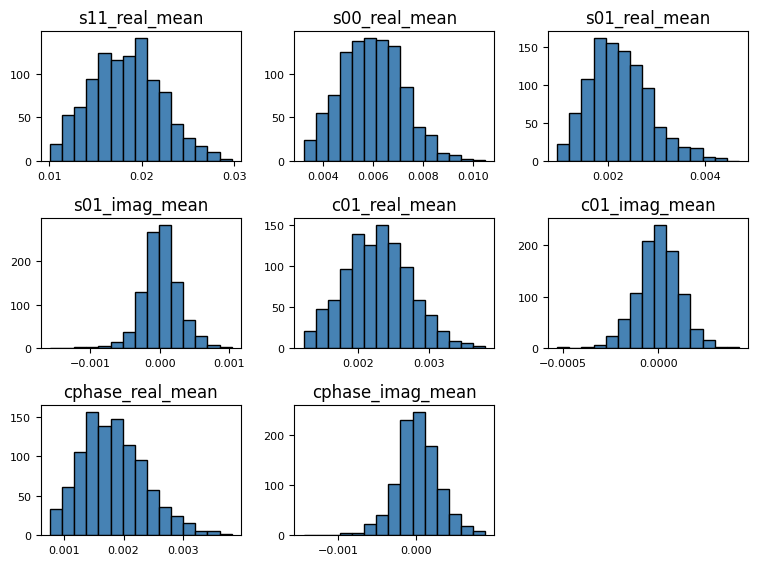

In [ ]:
# coefficients
mean_coeffs.hist(bins=15, color='steelblue',edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8,grid=False)
plt.tight_layout(rect=(0,0, 1.2, 1.2))

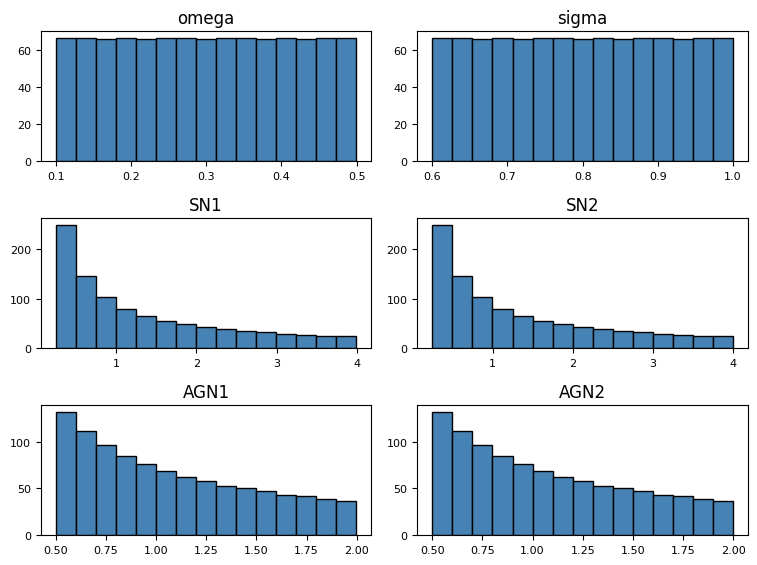

In [ ]:
# parameters
params.hist(bins=15, color='steelblue',edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8,grid=False)
plt.tight_layout(rect=(0,0, 1.2, 1.2))

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


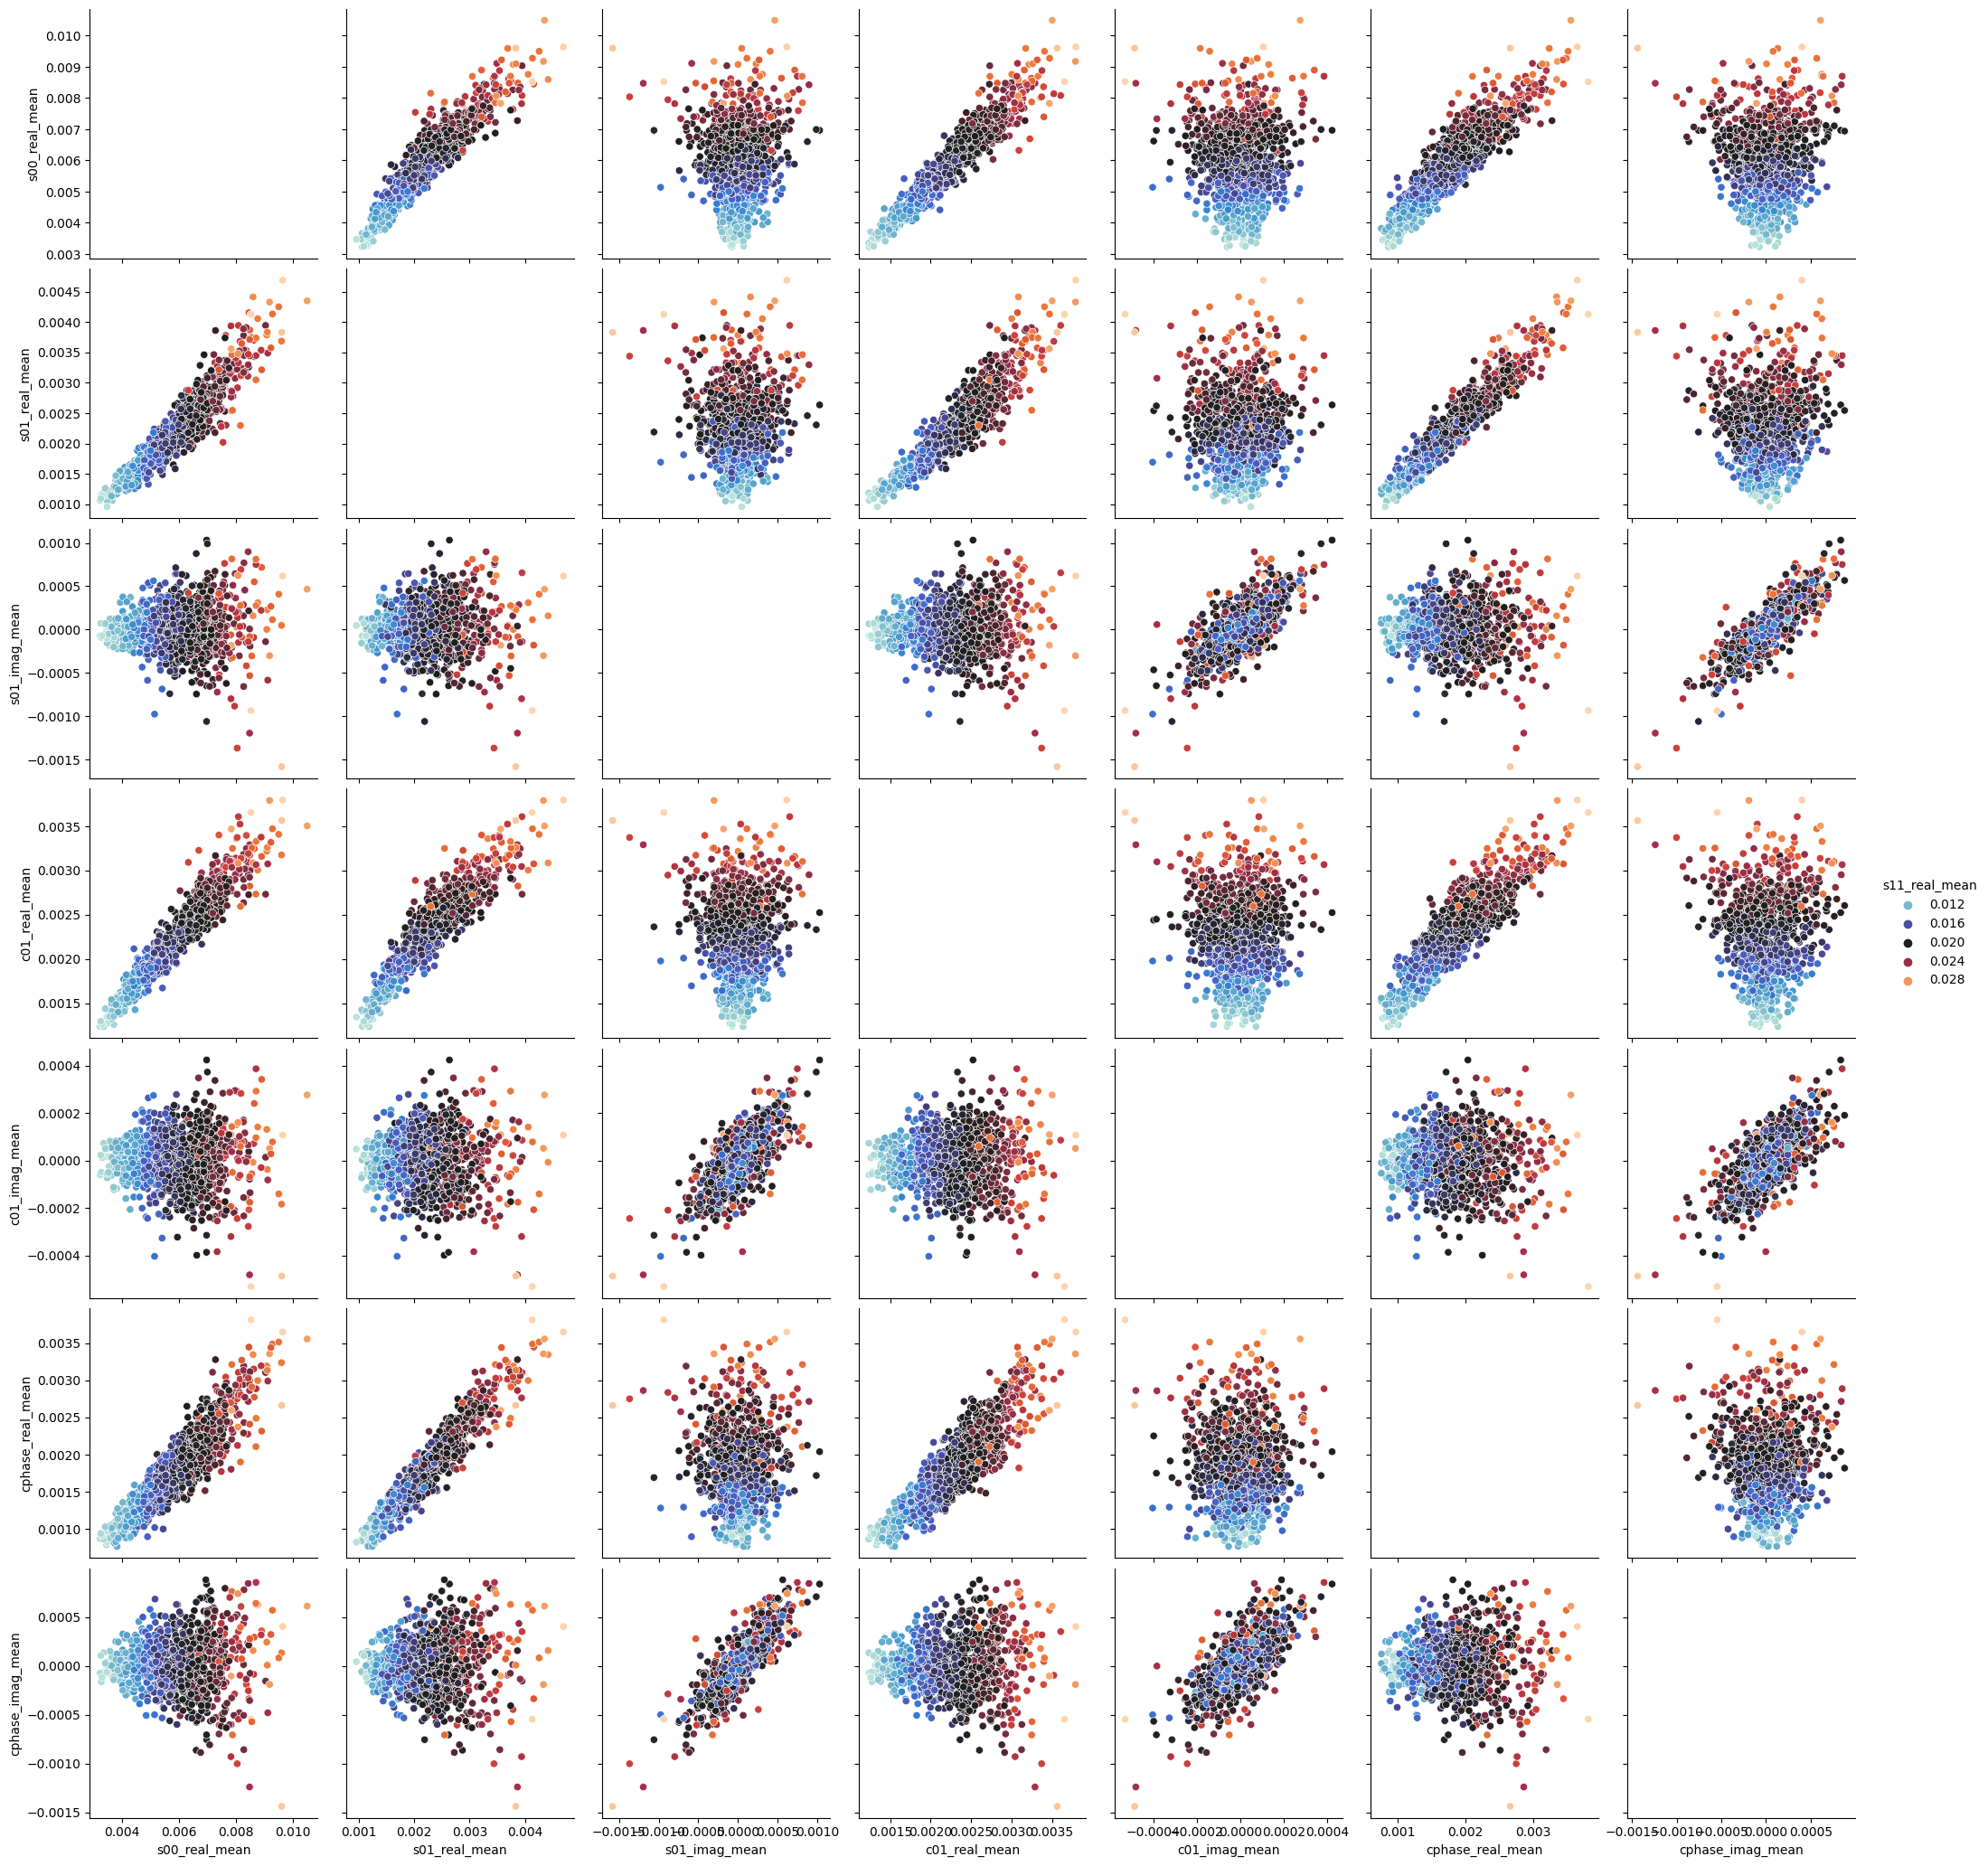

In [ ]:
sb.pairplot(mean_coeffs,hue='s11_real_mean', size=3, diag_kind='kde', palette= 'icefire')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


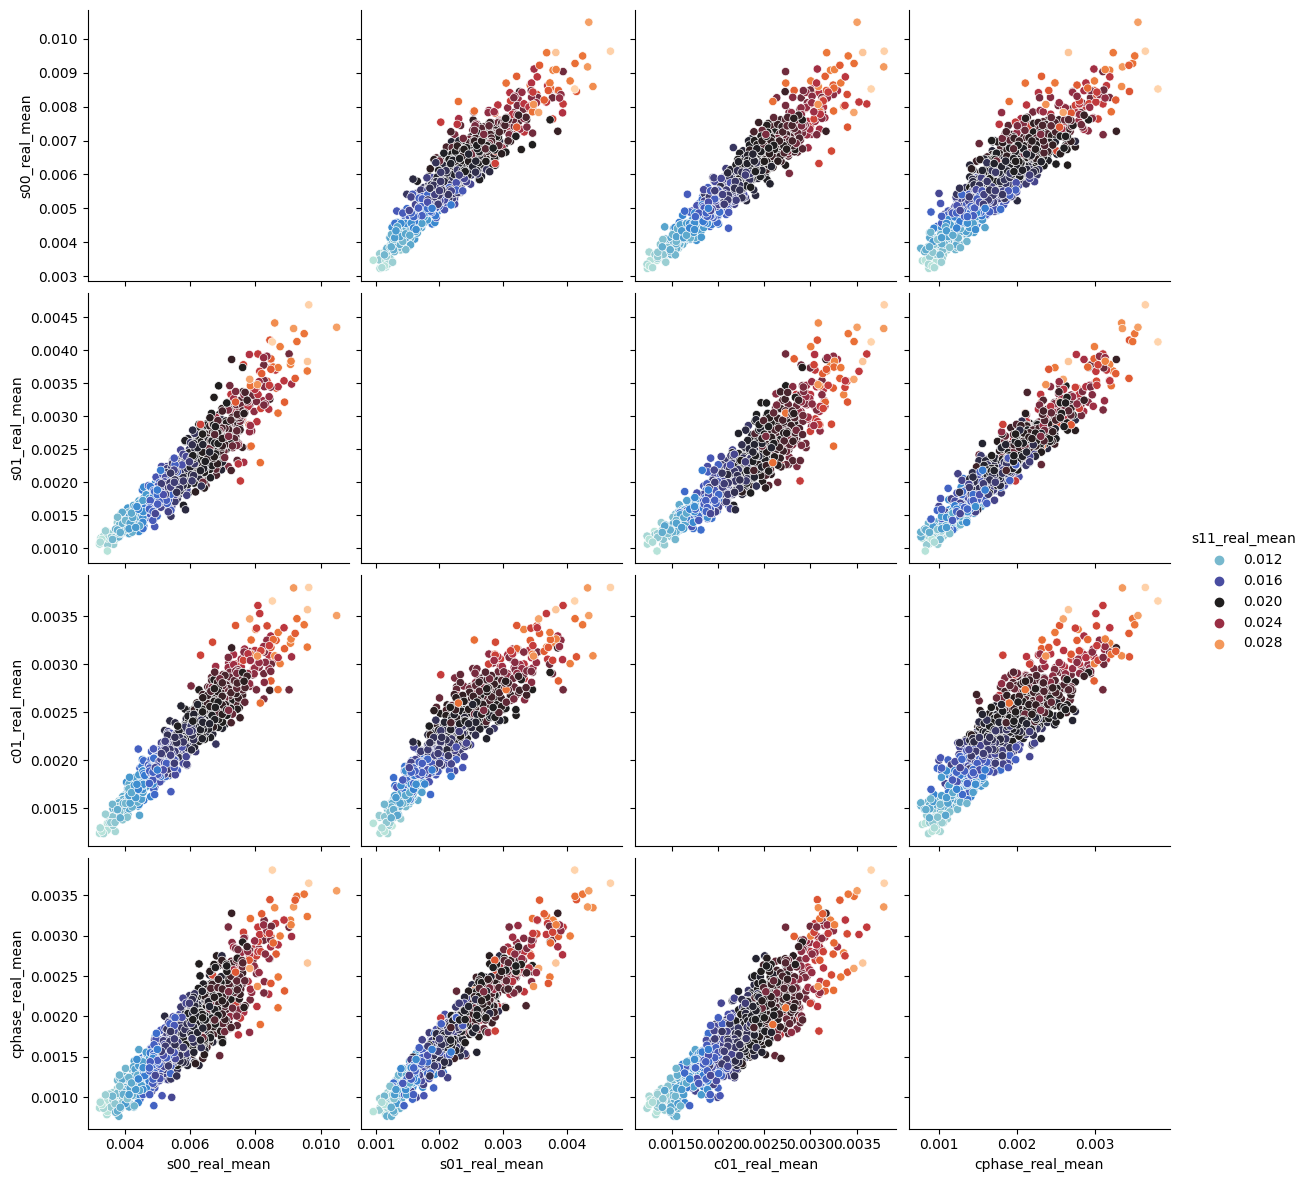

In [ ]:
mean_coeffs_real = pd.DataFrame()
mean_coeffs_real['s11_real_mean'] = mean_coeffs['s11_real_mean']
mean_coeffs_real['s00_real_mean'] = mean_coeffs['s00_real_mean']
mean_coeffs_real['s01_real_mean'] = mean_coeffs['s01_real_mean']
mean_coeffs_real['c01_real_mean'] = mean_coeffs['c01_real_mean']
mean_coeffs_real['cphase_real_mean'] = mean_coeffs['cphase_real_mean']

sb.pairplot(mean_coeffs_real,hue='s11_real_mean', size=3, diag_kind='kde', palette= 'icefire')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


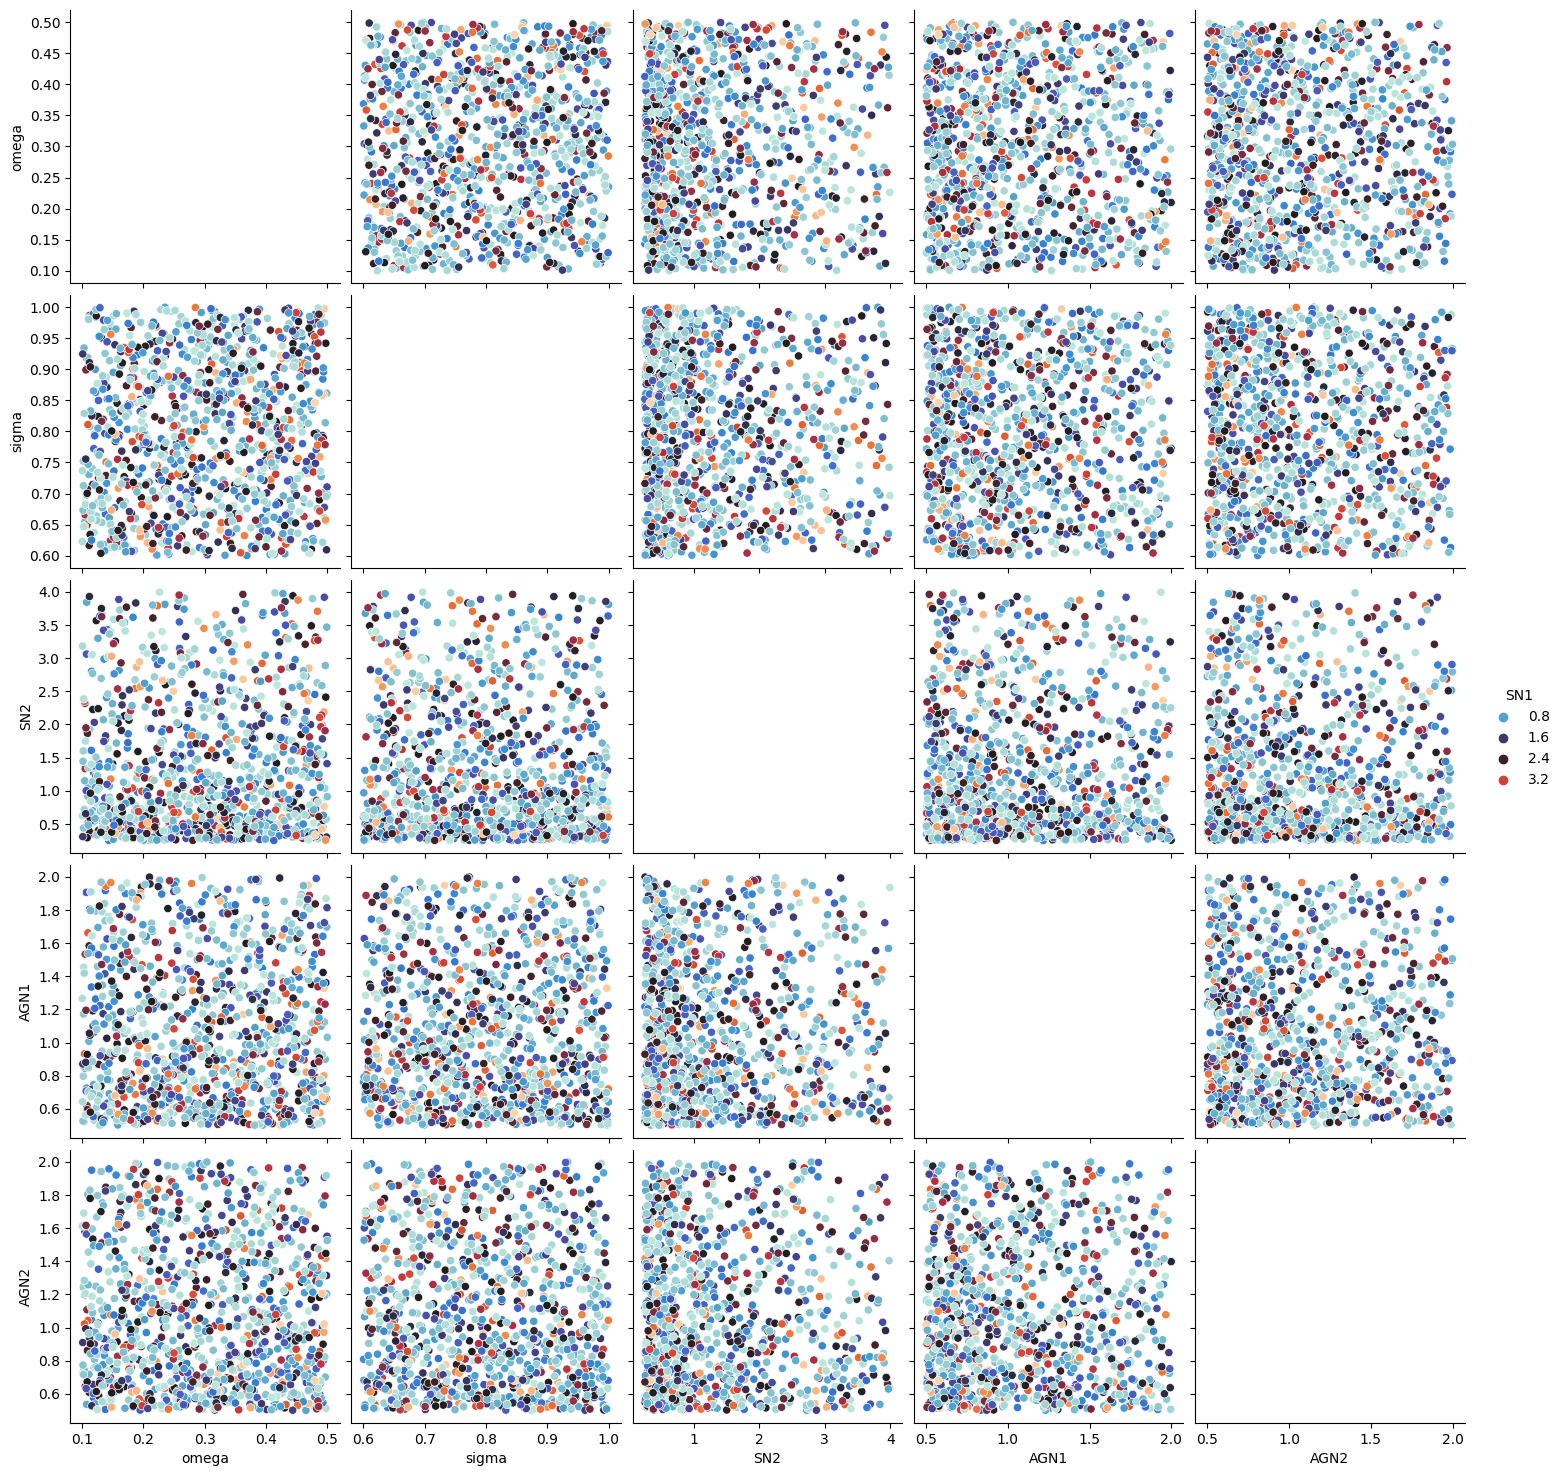

In [ ]:
sb.pairplot(params,hue='SN1', size=3, diag_kind='kde', palette= 'icefire')

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pca_mean = pca.fit_transform(mean_coeffs)

pos = pd.DataFrame()
pos['component 1'] = pca_mean[:, 0]
pos['component 2'] = pca_mean[:, 1]
#sb.scatterplot(pos)
pca.fit(mean_coeffs.values).explained_variance_ratio_

array([0.9735538 , 0.01200534])

Text(0, 0.5, 'component 2')

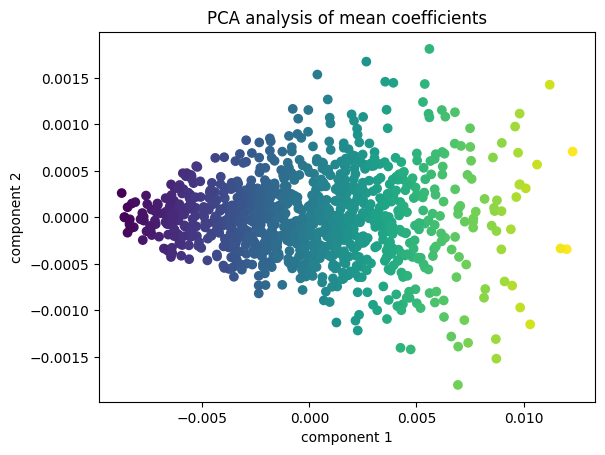

In [ ]:
pos['s11'] = mean_coeffs['s11_real_mean']
plt.scatter(pos['component 1'],pos['component 2'],c=pos['s11'])
plt.title('PCA analysis of mean coefficients')
plt.xlabel('component 1')
plt.ylabel('component 2')

In [ ]:
pca = PCA(n_components=2)
pca_mean_real = pca.fit_transform(mean_coeffs_real)

pos = pd.DataFrame()
pos['component 1'] = pca_mean_real[:, 0]
pos['component 2'] = pca_mean_real[:, 1]
#sb.scatterplot(pos)
print(pca.fit(mean_coeffs_real.values).explained_variance_ratio_)

[0.98337978 0.0121162 ]


Text(0, 0.5, 'component 2')

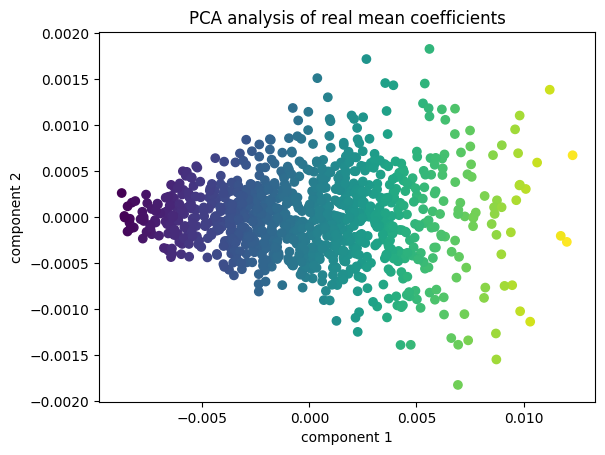

In [ ]:
pos['s11'] = mean_coeffs['s11_real_mean']
plt.scatter(pos['component 1'],pos['component 2'],c=pos['s11'])
plt.title('PCA analysis of real mean coefficients')
plt.xlabel('component 1')
plt.ylabel('component 2')

In [ ]:
pca = PCA(n_components=2)
pca_params = pca.fit_transform(params)

pos = pd.DataFrame()
pos['component 1'] = pca_params[:, 0]
pos['component 2'] = pca_params[:, 1]
#sb.scatterplot(pos)
print(pca.fit(params.values).explained_variance_ratio_)

[0.42867195 0.41433553]


Text(0, 0.5, 'component 2')

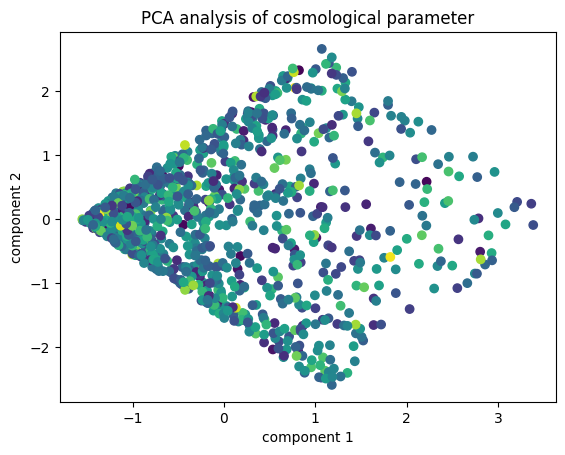

In [ ]:
pos['s11'] = mean_coeffs['s11_real_mean']
plt.scatter(pos['component 1'],pos['component 2'],c=pos['s11'])
plt.title('PCA analysis of cosmological parameters')
plt.xlabel('component 1')
plt.ylabel('component 2')